In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_df = churn_data.copy()
churn_df.drop(churn_df.columns[0],axis=1,inplace=True)
print(churn_df.head())

   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure   
0    15634602  Hargrave          619    France  Female   42       2  \
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary   
0       0.00              1          1               1        101348.88  \
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0  


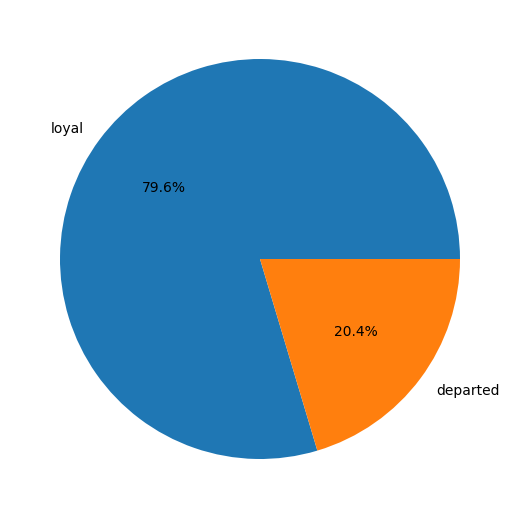

In [3]:
def get_exited_cat(exited_num):
    if exited_num == 0:
        return 'loyal'
    else:
        return 'departed'
     
churn_df['exited_status'] = churn_df['Exited'].apply(get_exited_cat)    
clients_exited = churn_df['exited_status'].value_counts()
#print(clients_exited)
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    clients_exited,
    labels=clients_exited.index,
    autopct='%.1f%%',
    #explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);


In [4]:
#из графика видно, что пятая часть из базы клиентов находится в статусе 'departed'

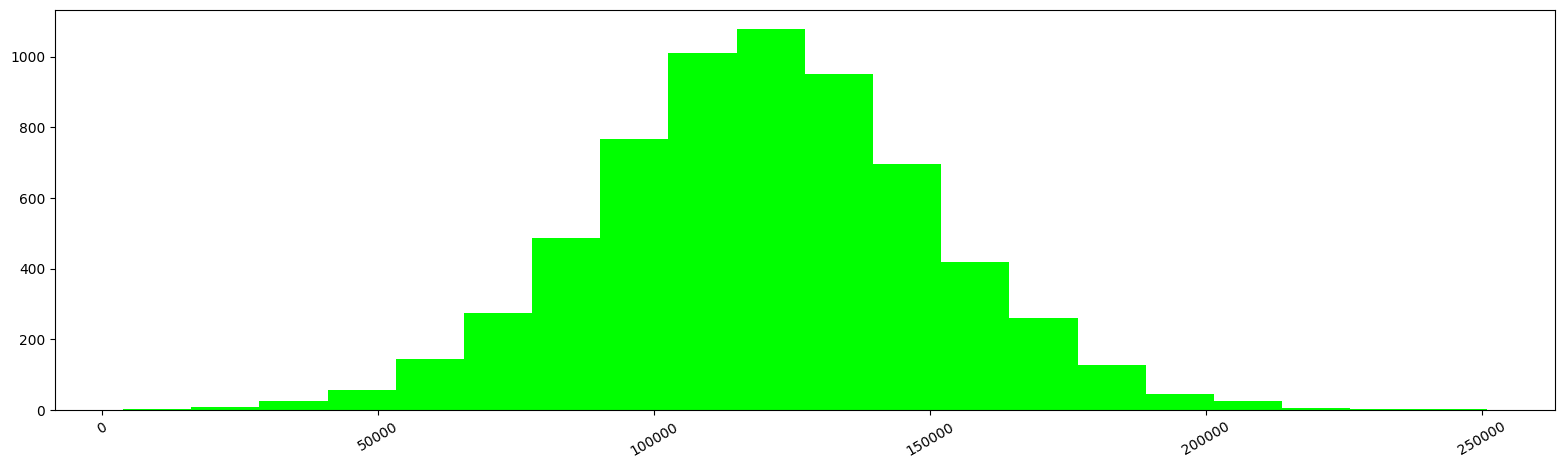

In [5]:
filtered = churn_df[churn_df['Balance']>2500]
#print(filtered)
fig = plt.figure(figsize=(15, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(x=filtered['Balance'],label='test',color="lime",bins=20)
axes.xaxis.set_tick_params(rotation=30)
#из графика видно, что основной костяк клиентов банка состоит из пользователей, у которых сумма на счету лежит в интервале от 90000 до 150000 долларов

In [6]:
#из графика видно, что в основном баланс на счетах клиента в банке состоит из пользователей, у которых сумма на счету лежит в интервале от 90000 до 150000 долларов

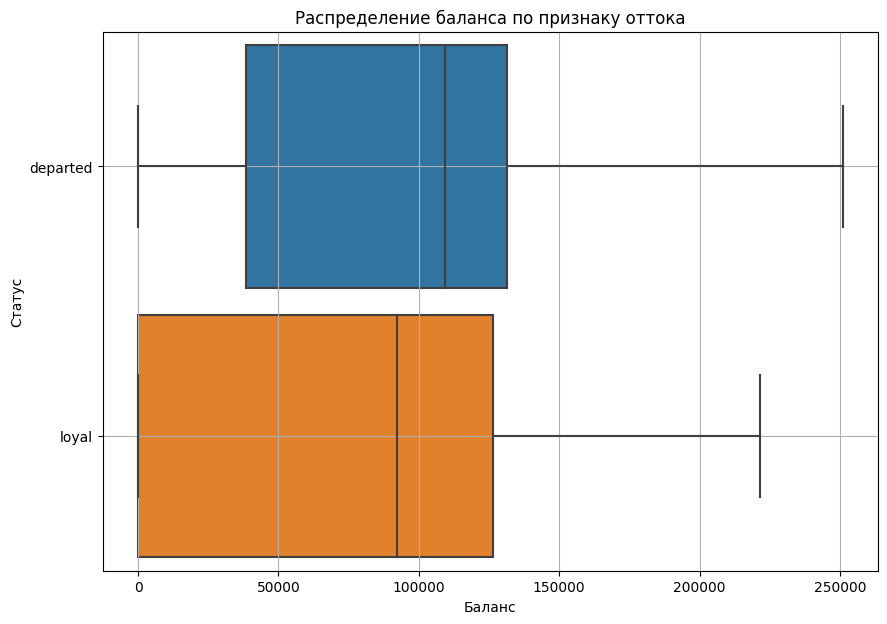

In [7]:
#print(churn_df[churn_df['Exited']==1]['Balance'].value_counts())
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_df,
    y='exited_status',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса по признаку оттока');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Статус');
boxplot.grid()

In [8]:
#

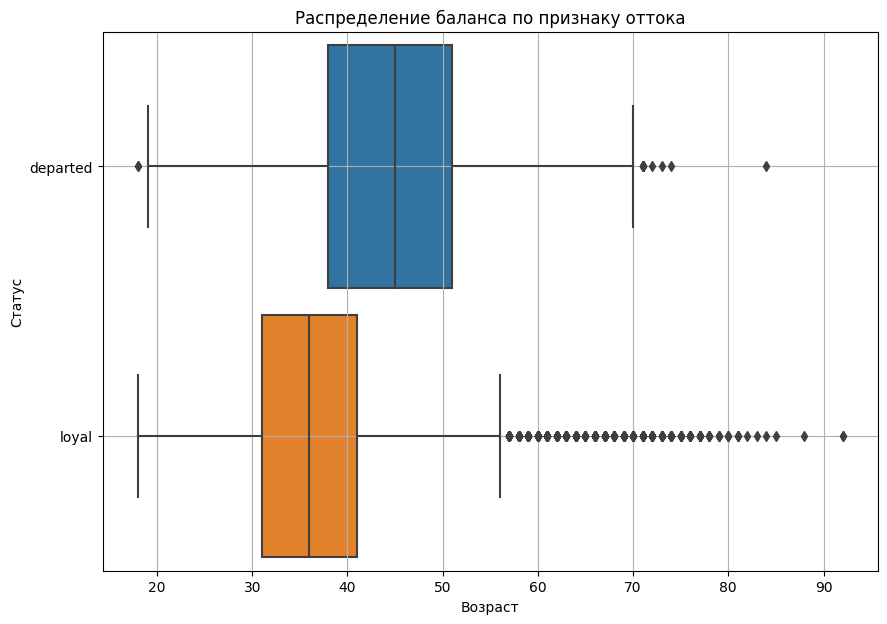

In [9]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_df,
    y='exited_status',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса по признаку оттока');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Статус');
boxplot.grid()

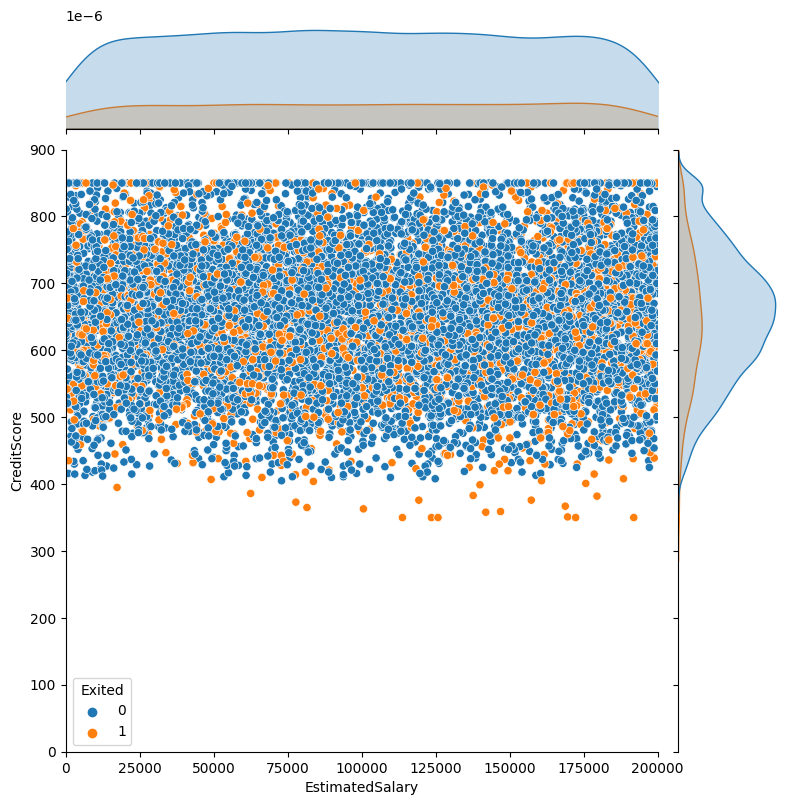

In [10]:
#print(churn_df['EstimatedSalary'].max())
jointplot = sns.jointplot(
    data=churn_df, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue='Exited',
    xlim = (0, 200000),
    ylim = (0, 900),
    height=8,
)

In [11]:
#

Gender
Female    4543
Male      5457
Name: Exited, dtype: int64


Text(0.5, 1.0, 'Количество ушедших клиентов по гендерному признаку')

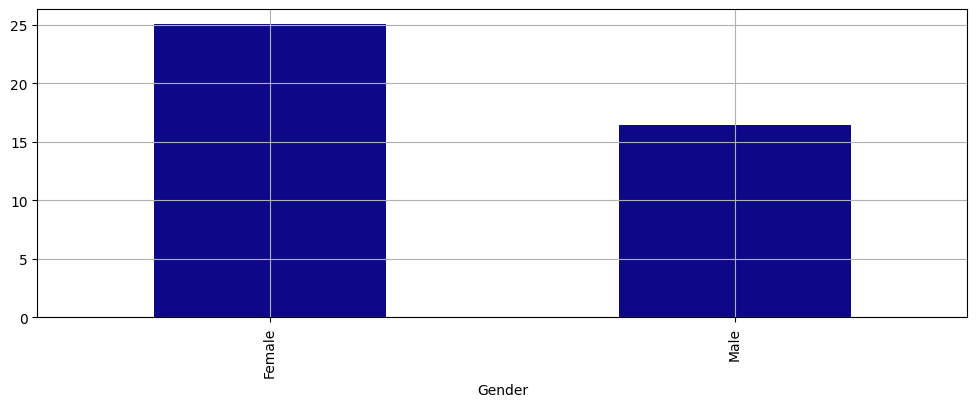

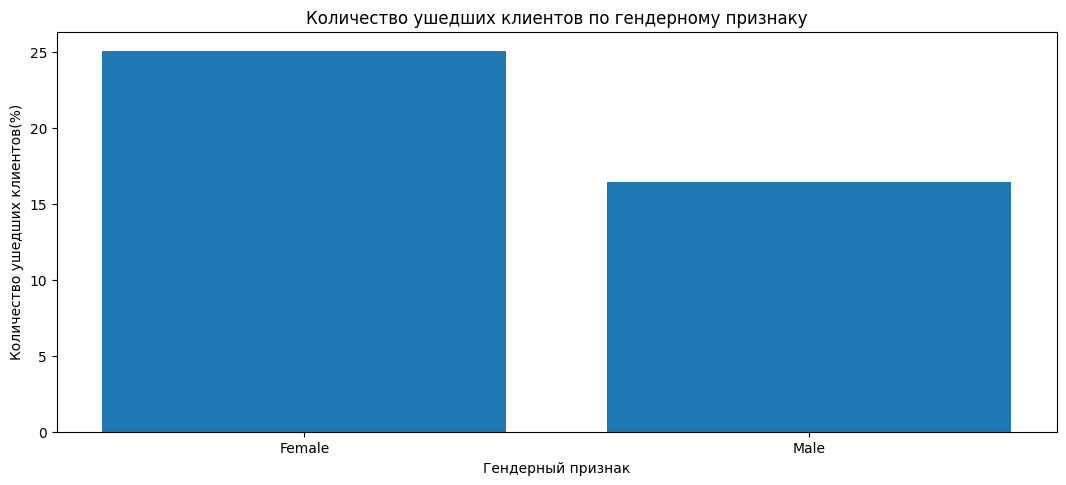

In [12]:
#print(churn_df[(churn_df['Exited']==1)&(churn_df['Gender']=='Male')])
print(churn_df.groupby('Gender')['Exited'].count())
client_gender = churn_df.groupby('Gender')['Exited'].mean()*100

client_gender.plot(kind='bar',grid=True,figsize=(12,4),colormap='plasma')

fig = plt.figure(figsize=(10, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = client_gender.index, height = client_gender);
main_axes.set_ylabel('Количество ушедших клиентов(%)')
main_axes.set_xlabel('Гендерный признак')
main_axes.set_title('Количество ушедших клиентов по гендерному признаку')


In [13]:
#

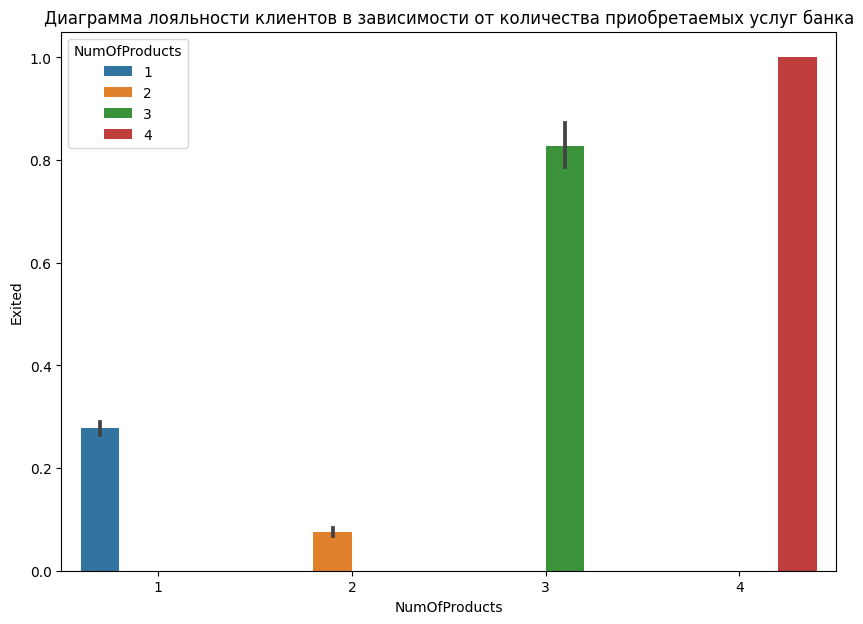

In [56]:
#9.7
#print(churn_df['NumOfProducts'].value_counts())
churn_df_d = churn_df['NumOfProducts'].value_counts()
fig = plt.figure(figsize=(10, 7))
#churn_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=churn_df,
    x='NumOfProducts',
    y='Exited',
    hue='NumOfProducts',
)
barplot.set_title('Диаграмма лояльности клиентов в зависимости от количества приобретаемых услуг банка');


In [ ]:
# Из диаграммы видно, что наиболее лояльные клиенты имеют по 2 услуги банка. Оранжевый столбик ближе всего к нулю. Ноль - это лояльность.